In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

dataset_path = './mushroom_data_all.csv'
dataset = pd.read_csv(dataset_path)
dataset['class_edible'] = dataset['class_edible'].map({'e':1, 'p':0})

features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

le = preprocessing.LabelEncoder()
for column in features:
    dataset[column] = le.fit_transform(dataset[column])
    
y = dataset['class_edible']
X = dataset[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=0.33)

sc = StandardScaler()
train_X = pd.DataFrame(sc.fit_transform(train_X))
val_X = pd.DataFrame(sc.fit_transform(val_X))

In [2]:
#results=[]
#for i in range(1,10):
#    model = KNeighborsClassifier(n_neighbors=i)
#    model.fit(train_X, train_y)
#    predicted = model.predict(val_X)
#    print(i)
#    mae = mean_absolute_error(val_y,predicted)
#    print(predicted)
#    train_accuracy = model.score(train_X,train_y)*100
#    test_accuracy = model.score(val_X,val_y)*100
#    print(mae)
#    print(train_accuracy)
#    print(test_accuracy)
#    results.append(mae)   
#from statistics import mean
#mean(results)

In [3]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)
predicted = model.predict(val_X)
mae = mean_absolute_error(val_y,predicted)
train_accuracy = model.score(train_X,train_y)*100
test_accuracy = model.score(val_X,val_y)*100
print(predicted)

[0 1 1 ... 0 1 0]


In [4]:
print('Mean absolute error: ')
print(mae)
print('Training set accuracy: ')
print(train_accuracy)
print('Test set accuracy: ')
print(test_accuracy)

Mean absolute error: 
0.0
Training set accuracy: 
100.0
Test set accuracy: 
100.0


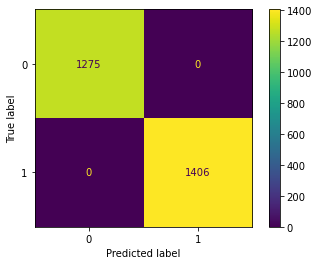

In [5]:
plot_confusion_matrix(model,val_X,val_y)

In [8]:
#results=[]
#for i in [100,200,300,400,500,600,700,800,900,1000]:
#    model = XGBRegressor(n_estimators=1000)
#    model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X,val_y)])
#    predicted = model.predict(val_X)
#    print(i)
#    mae = mean_absolute_error(val_y,predicted)
#    print(predicted)
#    accuracy = accuracy_score(predicted,val_y)*100
#    print(mae)
#    print(accuracy)
#    results.append(mae)    